# Pipeline Output Analysis & Visualization

## Purpose of This Notebook

This notebook performs **post-processing and analysis** of the cybersecurity pipeline output.

Its goal is to:

- load classified events produced by the pipeline,
- aggregate them over time,
- and visualize the results in a clear and interpretable form.

This notebook represents the **analysis and reporting stage** of the system.

---

## Role in the Overall Pipeline

This notebook operates **outside of the real-time pipeline**.

Important distinction:

- The producer and consumer notebooks are part of the **event-driven system**.
- This notebook works on **persisted results**.

This separation reflects real SOC workflows, where:
- detection pipelines run continuously,
- analysis and reporting are performed on stored data.

---

## Key Architectural Ideas Demonstrated

### 1. Separation of Processing and Analysis

The pipeline:
- produces structured data,
- does not generate dashboards.

This notebook:
- consumes stored results,
- performs analytical aggregation,
- generates visual representations.

This design avoids coupling analytics logic to the pipeline itself.

---

### 2. Time-Based Aggregation

Security analysis is inherently **time-oriented**.

In this notebook:
- raw event timestamps are grouped into fixed time windows,
- event counts are aggregated per time bucket.

This enables detection of:
- bursts of activity,
- changes in attack composition over time,
- trends in pipeline output.

---

### 3. Visualization as an Interpretation Layer

The stacked bar chart shows:

- time on the x-axis,
- number of events on the y-axis,
- MITRE ATT&CK tactics as stacked categories.

This allows you to security activity.

---

## Input Data

The notebook reads data from:




## Input Data

The notebook reads data fr :

classified_packet

This file was produced by the **consumer/classifier stage**.

It contains:
- event metadata,
- assigned MITRE ATT&CK tactic and technique,
- timestamps for temporal analysis.

---

## What This Notebook Does NOT Do

- It does **not** modify the pipeline.
- It does **not** send data back to Kafka.
- It does **not** emit traces.
- It does **not** perform real-time monitoring.

Its purpose is **offline analysis and interpretation**.

---

## How This Notebook Is Used in the Lab

1. Run the producer and consumer notebooks for several minutes.
2. Allow `classified_packets.csv` to accumulate data.
3. Stop or pause the pipeline if needed.
4. Run this notebook to analyze the collected results.
5. Experiment with:
   - different time bucket sizes,
   - different aggregation dimensions.

---

## Suggested Experiments

You are encouraged to modify this notebook to explore:

- aggregation by **MITRE technique** instead of tactic,
- filtering by specific hosts or users,
- different time resolutions (e.g. 30 seconds, 5 minutes),
- cumulative vs. per-interval counts.

---

## Key Takeaway

> **Cybersecurity pipelines produce data — insight comes from analysis.**

Understanding how to interpret pipeline output is as important
as understanding how the pipeline itself is built.

This notebook closes the loop:
from raw events → detection → structured results → insight.
s.csv

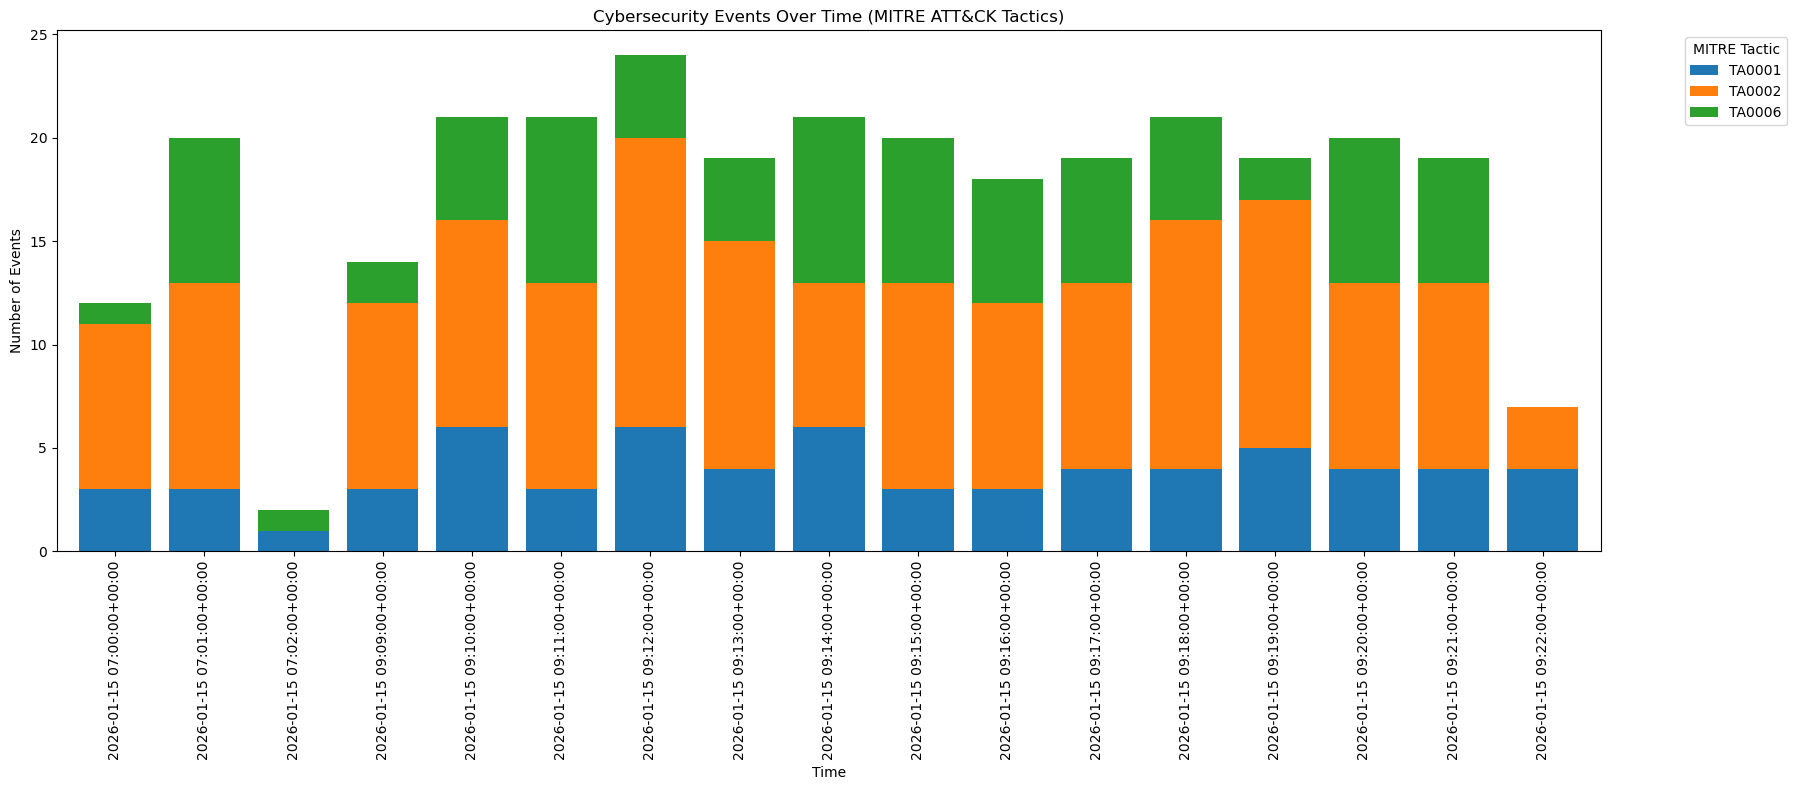

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "classified_packets.csv"
df = pd.read_csv(CSV_PATH)

df["timestamp"] = pd.to_datetime(df["timestamp"])
df["time_bucket"] = df["timestamp"].dt.floor("1min")

pivot = (
    df.groupby(["time_bucket", "mitre_tactic"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

# --- Create large figure and axes ---
fig, ax = plt.subplots(figsize=(18, 8))

pivot.plot(
    kind="bar",
    stacked=True,
    width=0.8,
    ax=ax,          # <-- important
)

ax.set_title("Cybersecurity Events Over Time (MITRE ATT&CK Tactics)")
ax.set_xlabel("Time")
ax.set_ylabel("Number of Events")

ax.legend(
    title="MITRE Tactic",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.tight_layout()
plt.show()